In [18]:
using PyPlot
using Images
using FileIO
using Statistics
using FFTW

# Here we import CorrelationFunctions.jl's modules Directional for computation 
# of correlation functions in predefined directions, Map for the whole correlation 
# maps and Utilities which has some helper functions, for example, for loading data.
import CorrelationFunctions.Directional as D
import CorrelationFunctions.Utilities as U
import CorrelationFunctions.Map as M

In [4]:
# Load a cube with the side of 500 voxels.
data = U.read_cuboid("samples/Ceramic-1.raw", 500, 3) |> BitArray;

![](image.png)

In [5]:
# Calculate periodic two-point correlation function for the phase 1
# along directions X = (1, 0, 0), Y = (0, 1, 0) and Z = (0, 0, 1)
s2 = D.s2(data, 1; periodic = true, directions = [U.DirX(), U.DirY(), U.DirZ()])

CorrelationFunctions.Directional.CorrelationData with 3 entries:
  DirX() => [0.616566, 0.584272, 0.552936, 0.523502, 0.496639, 0.472927, 0.4527…
  DirY() => [0.616566, 0.591055, 0.565931, 0.541483, 0.518005, 0.49582, 0.47527…
  DirZ() => [0.616566, 0.585003, 0.554353, 0.525548, 0.499208, 0.475839, 0.4558…

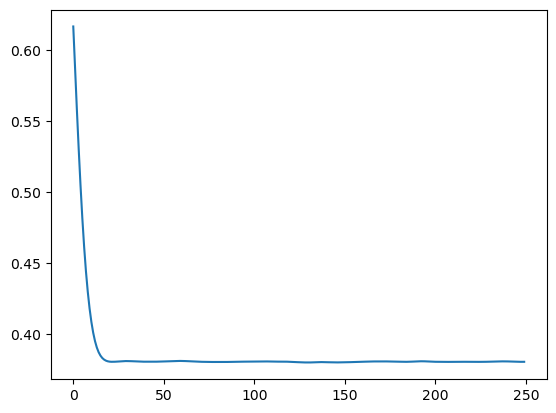

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xa2995b3a0>

In [9]:
# Average across those directions an make a plot
plot(mean(s2))

In [12]:
# It's also possible to calculate two-point correlation function with
# zero padding for boundary conditions. Here we use (1, 1, 1) as a direction.
s2 = D.s2(data, 1; periodic = true, directions = U.AbstractDirection[U.DirXYZ()])

CorrelationFunctions.Directional.CorrelationData with 1 entry:
  DirXYZ() => [0.616566, 0.564635, 0.51657, 0.475264, 0.442848, 0.419693, 0.404…

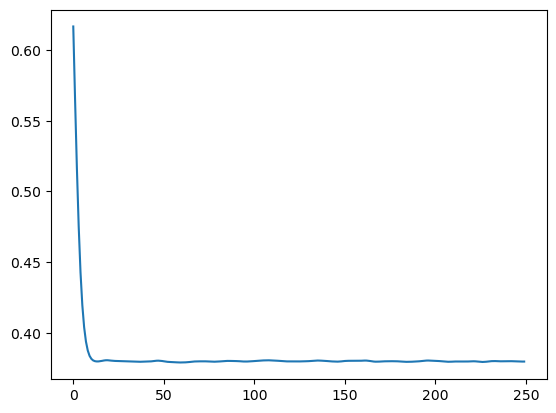

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xa461f6b80>

In [13]:
# Plot two-point function along that direction
plot(s2[U.DirXYZ()])

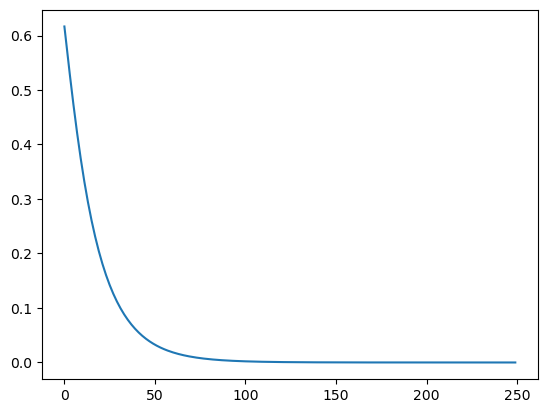

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xa46bae2b0>

In [17]:
# Other functions can be evaluated in the same manner, they all accept the same arguments.
# For example, here we evaluate lineal-path function. Directions can be omitted. They are
# defaulted to [U.DirX(), U.DirY(), U.DirZ()].
l2 = D.l2(data, 1; periodic = true)
plot(mean(l2))

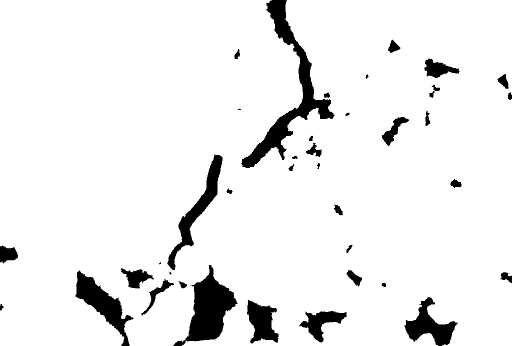

In [33]:
# Now load a 2D image
data = load("samples/carbonate1.png") |> BitArray
imresize(RGB.(data), ratio = 0.5)

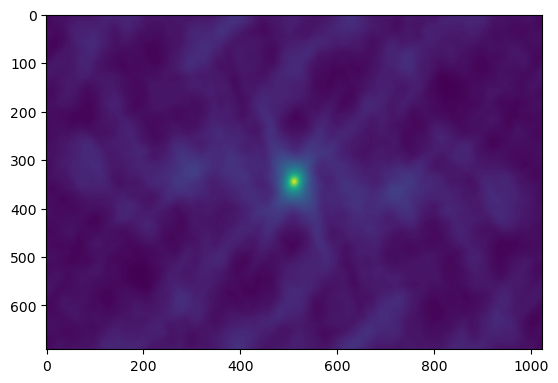

PyObject <matplotlib.image.AxesImage object at 0xd16554dc0>

In [34]:
# Here we calculate cluster function for all possible directions 
# (i.e. so-called correlation map) using periodic boundary conditions.
c2 = M.c2(data, 1; periodic = true)
imshow(fftshift(c2))

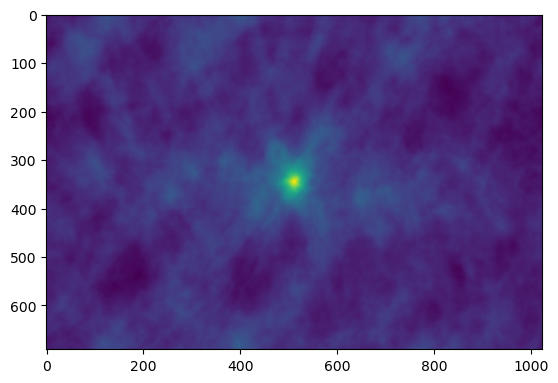

PyObject <matplotlib.image.AxesImage object at 0xd1f8e3bb0>

In [39]:
# The same for surface-void function
sv = M.surfvoid(data, 1; periodic = true)
imshow(fftshift(sv))